In [1]:
pip install lazypredict

In [2]:
!pip install lightgbm

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import joblib
import ast

In [4]:
from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.linear_model import Perceptron
from lazypredict.Supervised import LazyClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
import plotly.express as px
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, make_scorer, accuracy_score, recall_score, precision_score, f1_score
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from lightgbm import LGBMClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter

In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [6]:
df_uims = pd.read_excel('/content/gdrive/MyDrive/maintainability/Refs/JEditRefactoringsAndTDOneRefOneComp.xlsx')
df_uims.drop(columns=df_uims.columns[0], axis=1,  inplace=True)

In [7]:
df_uims.head(10)

,severity,debt,type,RTypes
0,2.87,8.83,1.07,Add Method Annotation
1,2.62,8.75,1.09,Empty_list
2,2.96,7.33,1.11,Replace Loop With Pipeline
3,2.82,11.99,1.00,Empty_list
4,2.85,38.77,1.00,Empty_list
5,2.77,22.20,1.20,Empty_list
6,3.23,16.15,1.00,Replace Anonymous With Lambda
7,3.14,9.10,1.00,Add Attribute Annotation
8,2.57,4.57,1.00,Empty_list
9,2.85,7.84,1.05,Move Attribute


In [8]:
df_uims['RTypes'] = df_uims['RTypes'].replace('[]', 'empty_list')

In [9]:
label_encoder = LabelEncoder()
df_uims['RTypes'] = label_encoder.fit_transform(df_uims['RTypes'])

In [10]:
train, test = train_test_split(df_uims, test_size=0.2)

In [11]:
features = df_uims.columns[:-1]
X = train[features] # her we are droping the output feature as this is the target and 'X' is input features, the changes are not
                                # made inplace as we have not used 'inplace = True'
y = train['RTypes'] # Output/Dependent variable
XTest = test[features]
YTest = test['RTypes']

In [12]:
X_train, X_val_, y_train, y_val_ = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [13]:
X_val, X_test, y_val, y_test = train_test_split(XTest, YTest, test_size = 0.5, random_state = 42)

In [14]:
# lets print the shapes again
print("Shape of the X Train :", X_train.shape)
print("Shape of the y Train :", y_train.shape)
print("Shape of the X val :", X_val.shape)
print("Shape of the y val :", y_val.shape)
print("Shape of the X test :", X_test.shape)
print("Shape of the y test :", y_test.shape)

Shape of the X Train : (500, 3)
Shape of the y Train : (500,)
Shape of the X val : (89, 3)
Shape of the y val : (89,)
Shape of the X test : (90, 3)
Shape of the y test : (90,)


In [15]:
fs = SelectKBest(score_func=f_classif, k='all')

In [16]:
print(X_train)

     severity  debt  type
12       2.90 15.70  1.00
563      2.23  3.64  1.84
571      2.75  9.88  1.75
308      2.81  6.76  1.00
742      2.00  5.00  1.00
..        ...   ...   ...
55       2.82 22.06  1.15
421      3.04 19.00  1.00
822      2.00  5.00  1.00
184      3.00  5.00  1.00
208      2.71  6.71  1.00

[500 rows x 3 columns]


In [17]:
fs.fit(X_train, y_train)

SelectKBest(k='all')

Importance of severity is 0.697248
Importance of debt is 0.432163
Importance of type is 0.667850


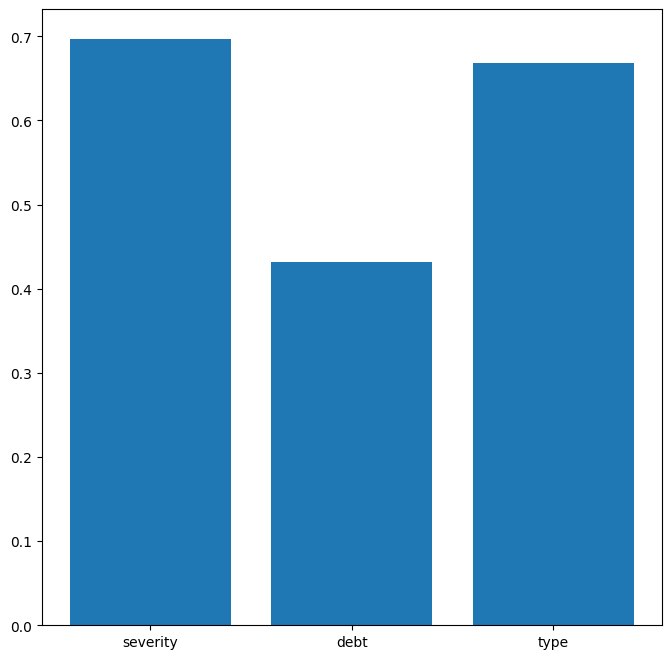

In [18]:
feature_names=X.columns
for i in range(len(fs.scores_)):
	print('Importance of ' +feature_names[i]+' is %f' % (fs.scores_[i]))
# plot the scores
plt.rcParams["figure.figsize"] = (8,8)
plt.bar([i for i in X.columns], fs.scores_)
plt.show()

In [19]:
reg = LazyClassifier(predictions=True)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

models

 76%|███████▌  | 22/29 [00:01<00:00, 16.12it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000229 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 301
[LightGBM] [Info] Number of data points in the train set: 500, number of used features: 3
[LightGBM] [Info] Start training from score -6.214608
[LightGBM] [Info] Start training from score -4.135167
[LightGBM] [Info] Start training from score -4.422849
[LightGBM] [Info] Start training from score -6.214608
[LightGBM] [Info] Start training from score -6.214608
[LightGBM] [Info] Start training from score -5.521461
[LightGBM] [Info] Start training from score -0.059750
[LightGBM] [Info] Start training from score -6.214608
[LightGBM] [Info] Start training from score -6.214608
[LightGBM] [Info] Start training from score -6.214608
[LightGBM] [Info] Start training from score -6.214608
[LightGBM] [Info] Start training from score -6.214608
[LightGBM] [Info] Start training from score -5.521461
[LightGBM] [I

100%|██████████| 29/29 [00:02<00:00, 11.45it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
AdaBoostClassifier,1.00,1.00,None,1.00,0.14
LabelSpreading,1.00,1.00,None,1.00,0.04
SVC,1.00,1.00,None,1.00,0.02
SGDClassifier,1.00,1.00,None,1.00,0.02
RidgeClassifierCV,1.00,1.00,None,1.00,0.01
RidgeClassifier,1.00,1.00,None,1.00,0.03
Perceptron,1.00,1.00,None,1.00,0.02
PassiveAggressiveClassifier,1.00,1.00,None,1.00,0.02
LogisticRegression,1.00,1.00,None,1.00,0.04


In [20]:
clf = LazyClassifier(predictions=True)

In [21]:
train, test = train_test_split(df, test_size=0.2)

NameError: ignored

In [ ]:
features = df.columns[:-1]
features
X = train[features] # her we are droping the output feature as this is the target and 'X' is input features, the changes are not
                                # made inplace as we have not used 'inplace = True'
y = train['Frequency'] # Output/Dependent variable
XTest = test[features]
YTest = test['Frequency']

In [ ]:
X_train, X_val_, y_train, y_val_ = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [ ]:
gb = GradientBoostingClassifier(
        n_estimators=200,
        validation_fraction=0.2,
        n_iter_no_change=5,
        tol=0.01,
        random_state=0,
    )

In [ ]:
gb.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=200, n_iter_no_change=5, random_state=0,
                           tol=0.01, validation_fraction=0.2)

In [ ]:
X_val, X_test, y_val, y_test = train_test_split(XTest, YTest, test_size = 0.5, random_state = 42)

In [ ]:
scores = gb.score(X_test, y_test)
scores

1.0

In [ ]:
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
models

 97%|█████████▋| 28/29 [01:02<00:00,  1.05it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000462 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 300
[LightGBM] [Info] Number of data points in the train set: 10000, number of used features: 4
[LightGBM] [Info] Start training from score -5.298317
[LightGBM] [Info] Start training from score -2.622790
[LightGBM] [Info] Start training from score -3.821269
[LightGBM] [Info] Start training from score -2.513306
[LightGBM] [Info] Start training from score -3.375530
[LightGBM] [Info] Start training from score -2.686778
[LightGBM] [Info] Start training from score -2.305590
[LightGBM] [Info] Start training from score -2.741090
[LightGBM] [Info] Start training from score -3.589940
[LightGBM] [Info] Start training from score -6.725434
[LightGBM] [Info] Start training from score -5.083206
[LightGBM] [Info] Start training from score -3.676951
[LightGBM] [Info] Start training from score -8.517193
[LightGBM] 

100%|██████████| 29/29 [01:06<00:00,  2.30s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
DecisionTreeClassifier,1.00,1.00,None,1.00,0.03
XGBClassifier,1.00,1.00,None,1.00,1.91
ExtraTreeClassifier,1.00,1.00,None,1.00,0.03
ExtraTreesClassifier,1.00,1.00,None,1.00,0.67
GaussianNB,1.00,1.00,None,1.00,0.03
RandomForestClassifier,1.00,1.00,None,1.00,0.62
LinearDiscriminantAnalysis,1.00,1.00,None,1.00,0.04
BaggingClassifier,1.00,1.00,None,1.00,0.10
KNeighborsClassifier,0.98,0.95,None,0.98,0.19


In [ ]:
model = ExtraTreesClassifier()

In [ ]:
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'recall': make_scorer(recall_score, average='weighted'),
    'precision': make_scorer(precision_score, average='weighted'),
    'f1_score': make_scorer(f1_score, average='weighted')
}

In [ ]:
results = cross_validate(model, X, y, cv=5, scoring=scoring)

# Access the results
accuracy_scores = results['test_accuracy']
recall_scores = results['test_recall']
precision_scores = results['test_precision']
f1_scores = results['test_f1_score']

In [ ]:
print(accuracy_scores)
print(recall_scores)
print(precision_scores)
print(f1_scores)

[1.         0.99930021 1.         1.         1.        ]
[1.         0.99930021 1.         1.         1.        ]
[1.         0.99866404 1.         1.         1.        ]
[1.         0.99896698 1.         1.         1.        ]


In [ ]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

1.00 accuracy with a standard deviation of 0.00


In [ ]:
model.fit(X_train, y_train)

ExtraTreesClassifier()

In [ ]:
y_pred_test= model.predict(X_test)

In [ ]:
print(classification_report(np.array(y_test), y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00       126
           2       1.00      1.00      1.00        49
           3       1.00      1.00      1.00       151
           4       1.00      1.00      1.00        70
           5       1.00      1.00      1.00       121
           6       1.00      1.00      1.00       163
           7       1.00      1.00      1.00       119
           8       1.00      1.00      1.00        50
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         7
          11       1.00      1.00      1.00        38
          13       1.00      1.00      1.00        43
          14       1.00      1.00      1.00        90
          15       1.00      1.00      1.00        31
          16       1.00      1.00      1.00         3
          17       1.00      1.00      1.00        58
          18       1.00    

In [ ]:
df_test = pd.read_excel('/content/gdrive/MyDrive/maintainability/try.xlsx')

In [ ]:
df_test.head()

,component,severity,debt,type,FrequencyClass
0,src/org/gjt/sp/jedit/ActionSet.java,2.71,5.69,1.00,45
1,src/org/gjt/sp/jedit/Autosave.java,3.00,6.25,1.12,8
2,src/org/gjt/sp/jedit/BeanShellAction.java,2.96,6.96,1.00,27
3,src/org/gjt/sp/jedit/Buffer.java,2.87,8.70,1.07,698
4,src/org/gjt/sp/jedit/EBMessage.java,2.64,5.41,1.00,22


In [ ]:
df_test.drop(columns=df_test.columns[0], axis=1,  inplace=True)

In [ ]:
df_test.head()

,severity,debt,type,FrequencyClass
0,2.71,5.69,1.00,45
1,3.00,6.25,1.12,8
2,2.96,6.96,1.00,27
3,2.87,8.70,1.07,698
4,2.64,5.41,1.00,22


In [ ]:
y_pred_test= model.predict(X_test)

In [ ]:
fs = SelectKBest(score_func=f_classif, k='all')

In [ ]:
fs.fit(X_test, y_test)

SelectKBest(k='all')

Importance of severity is 19.997996
Importance of debt is 0.658021
Importance of type is 69.650558
Importance of FrequencyClass is 212.261479


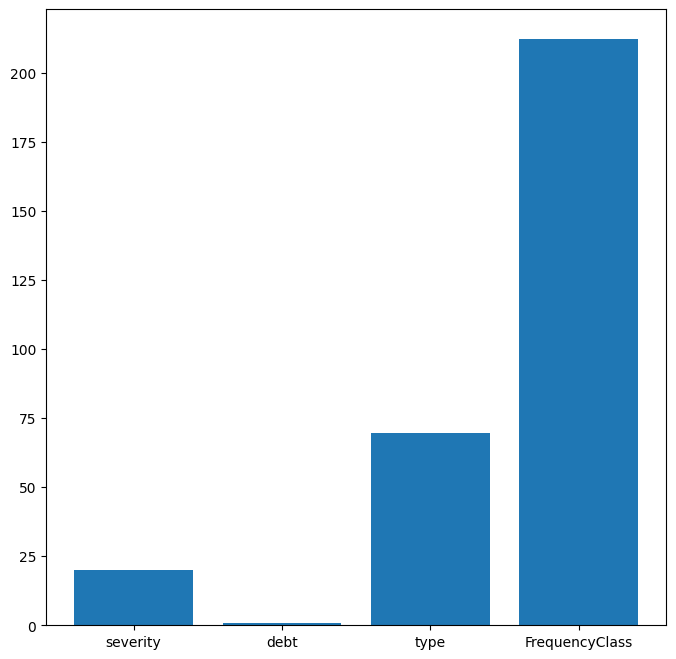

In [ ]:
feature_names=X.columns
for i in range(len(fs.scores_)):
	print('Importance of ' +feature_names[i]+' is %f' % (fs.scores_[i]))
# plot the scores
plt.rcParams["figure.figsize"] = (8,8)
plt.bar([i for i in X.columns], fs.scores_)
plt.show()

In [ ]:
print(classification_report(np.array(y_test), y_pred_test))

              precision    recall  f1-score   support

        Good       1.00      0.97      0.98       218
       Great       0.97      1.00      0.98       220
        Poor       1.00      0.98      0.99        42

    accuracy                           0.98       480
   macro avg       0.99      0.98      0.98       480
weighted avg       0.98      0.98      0.98       480



In [ ]:
cm = confusion_matrix(y_test, y_pred_test)
print(cm)

[[212   6   0]
 [  1 219   0]
 [  0   1  41]]


In [ ]:
filename = '/content/gdrive/MyDrive/maintainability/Refs/finalized_model.sav'
joblib.dump(model, filename)

['/content/gdrive/MyDrive/maintainability/Refs/finalized_model.sav']

In [109]:
df = pd.read_excel('/content/gdrive/MyDrive/maintainability/Refs/TuxGuitarRefactoringsAndTDOneRefOneComp.xlsx')
df.drop(columns=df.columns[0], axis=1,  inplace=True)

In [110]:
df = df.dropna()

In [111]:
classes_to_increase = df['RTypes'].value_counts()[df['RTypes'].value_counts() == 1].index.tolist()

# Create a mask to identify rows corresponding to classes_to_increase
mask = df['RTypes'].isin(classes_to_increase)

# Separate data into X and y
X = df.drop(columns=['RTypes'])
y = df['RTypes']

# Apply over-sampling only to the specified classes
oversampler = RandomOverSampler(sampling_strategy={cls: 3500 for cls in classes_to_increase})
X_resampled, y_resampled = oversampler.fit_resample(X[mask], y[mask])

# Combine the resampled data with the original data for the specified classes
df_resampled = pd.concat([X_resampled, y_resampled], axis=1)

# Combine the resampled data with the original data for other classes
df_final = pd.concat([df[~mask], df_resampled])

In [112]:
df = df_final

In [113]:
le = LabelEncoder()
#df['severity'] = le.fit_transform(df['severity'])
#df['type'] = le.fit_transform(df['type'])
df['RTypes'] = le.fit_transform(df['RTypes'])

In [114]:
train, test = train_test_split(df, test_size=0.2)

In [115]:
features = df.columns[:-1]
features
X = train[features] # her we are droping the output feature as this is the target and 'X' is input features, the changes are not
                                # made inplace as we have not used 'inplace = True'
y = train['RTypes'] # Output/Dependent variable
XTest = test[features]
YTest = test['RTypes']

In [116]:
X = np.asarray(X).astype('float32')
y = np.asarray(y).astype('float32')

In [117]:
#norms = np.linalg.norm(X, axis=1, keepdims=True)
#X = X / norms
min_val = 0.0
max_val = 36.0

# Check if values are outside the interval and set them to 0.0
X[(X < min_val) | (X > max_val)] = 0.0

X = np.nan_to_num(X, nan=0.0)

In [118]:
print(set(df['RTypes']))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10}


In [58]:
print(Counter(y))

Counter({2.0: 2829, 8.0: 2815, 0.0: 2811, 6.0: 2797, 10.0: 2785, 7.0: 2758, 5.0: 1030, 9.0: 2, 4.0: 2, 1.0: 2, 3.0: 2})


In [59]:
int_array = y.astype(int)
predicted_labels = label_encoder.inverse_transform(int_array)
print(Counter(predicted_labels))

Counter({'Add Method Annotation': 2829, 'Empty_list': 2815, 'Add Attribute Annotation': 2811, 'Change Return Type': 2797, 'Merge Catch': 2785, 'Change Variable Type': 2758, 'Change Parameter Type': 1030, 'Extract Method': 2, 'Change Attribute Access Modifier': 2, 'Add Attribute Modifier': 2, 'Add Parameter Annotation': 2})


In [60]:
sampling_strategy = {0: 1500, 1: 1600, 2: 1800, 3: 1500, 4: 1500, 7: 1500, 8: 1500, 9: 1500, 10: 1500, 11: 1500, 12: 1500, 13: 1500, 14: 1500, 15: 1500, 16: 1500, 17: 1500}
over = SMOTE(sampling_strategy=sampling_strategy)
under = RandomUnderSampler(sampling_strategy=sampling_strategy)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
X, y = pipeline.fit_resample(X, y)

ValueError: ignored

In [119]:
clf = LazyClassifier(predictions=True)

In [120]:
X_train, X_val_, y_train, y_val_ = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [121]:
gb = GradientBoostingClassifier(
        n_estimators=200,
        validation_fraction=0.2,
        n_iter_no_change=5,
        tol=0.01,
        random_state=0,
    )

In [122]:
gb.fit(X_train, y_train)

ValueError: ignored

In [123]:
X_val, X_test, y_val, y_test = train_test_split(XTest, YTest, test_size = 0.5, random_state = 42)

In [124]:
scores = gb.score(X_test, y_test)
scores

AttributeError: ignored

In [125]:
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
models

 97%|█████████▋| 28/29 [00:37<00:00,  1.45it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000144 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 192
[LightGBM] [Info] Number of data points in the train set: 12483, number of used features: 3
[LightGBM] [Info] Start training from score -1.847858
[LightGBM] [Info] Start training from score -9.432123
[LightGBM] [Info] Start training from score -1.840261
[LightGBM] [Info] Start training from score -9.432123
[LightGBM] [Info] Start training from score -9.432123
[LightGBM] [Info] Start training from score -2.861240
[LightGBM] [Info] Start training from score -1.879361
[LightGBM] [Info] Start training from score -1.846842
[LightGBM] [Info] Start training from score -1.851423
[LightGBM] [Info] Start training from score -9.432123
[LightGBM] [Info] Start training from score -1.840766
[LightGBM] [Warning] No further splits with positive ga

100%|██████████| 29/29 [00:38<00:00,  1.34s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
RandomForestClassifier,0.82,0.72,None,0.77,0.66
XGBClassifier,0.82,0.72,None,0.77,0.82
DecisionTreeClassifier,0.82,0.72,None,0.77,0.03
ExtraTreeClassifier,0.82,0.72,None,0.77,0.03
ExtraTreesClassifier,0.82,0.72,None,0.77,0.48
BaggingClassifier,0.82,0.72,None,0.77,0.12
LGBMClassifier,0.82,0.72,None,0.77,1.31
GaussianNB,0.82,0.72,None,0.77,0.02
KNeighborsClassifier,0.82,0.72,None,0.77,0.22


In [102]:
model = ExtraTreesClassifier()

In [103]:
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'recall': make_scorer(recall_score, average='weighted'),
    'precision': make_scorer(precision_score, average='weighted'),
    'f1_score': make_scorer(f1_score, average='weighted')
}

In [104]:
results = cross_validate(model, X, y, cv=5, scoring=scoring)

# Access the results
accuracy_scores = results['test_accuracy']
recall_scores = results['test_recall']
precision_scores = results['test_precision']
f1_scores = results['test_f1_score']

In [105]:
print(accuracy_scores)
print(recall_scores)
print(precision_scores)
print(f1_scores)

[0.997426 0.996568 0.997855 0.997855 0.997426]
[0.997426 0.996568 0.997855 0.997855 0.997426]
[0.99580862 0.99575988 0.9958305  0.9958305  0.99502552]
[0.99659828 0.99615918 0.99681349 0.99681349 0.99618389]


In [106]:
model.fit(X_train, y_train)

ExtraTreesClassifier()

In [107]:
y_pred_test= model.predict(X_test)

In [108]:
print(classification_report(np.array(y_test), y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       369
           2       1.00      1.00      1.00       336
           3       0.00      0.00      0.00         1
           5       0.98      1.00      0.99        54
           6       1.00      1.00      1.00       363
           9       1.00      1.00      1.00       334

    accuracy                           1.00      1457
   macro avg       0.83      0.83      0.83      1457
weighted avg       1.00      1.00      1.00      1457



In [ ]:
print(type(y_pred_test[0]))

<class 'numpy.float32'>


In [ ]:
int_array = y_pred_test.astype(int)
predicted_labels = label_encoder.inverse_transform(int_array)

In [ ]:
print(predicted_labels)

['Split Conditional' 'Change Return Type' 'Change Parameter Type' ...
 'Replace Variable With Attribute' 'Split Conditional'
 'Remove Method Modifier']


In [ ]:
filename = '/content/gdrive/MyDrive/maintainability/Refs/finalized_model.sav'
joblib.dump(model, filename)

['/content/gdrive/MyDrive/maintainability/Refs/finalized_model.sav']

In [ ]:
filename = '/content/gdrive/MyDrive/maintainability/encoder.sav'
joblib.dump(label_encoder, filename)

['/content/gdrive/MyDrive/maintainability/encoder.sav']